# Анализ полученных данных средствами Python

Получены файлы, в которых содержатся результаты запросов из предыдущих этапов проекта.

`/datasets/query_1.csv` — результат первого запроса. В нём содержится информация о:

- `model` — модели самолета
- `flights_amount` — количество рейсов для каждой модели самолетов `model` в сентябре 2018 года


`/datasets/query_3.csv` — результат третьего запроса. В нём содержится информация о:

- `city` — городах
- `average_flights` — среднем количестве рейсов, прибывающих в город `city` за день в сентябре 2018 года

Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;


- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- проверить гипотезу о влиянии фестевалей на средний спрос на авиабилеты.

## 1. Изучение данных

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [3]:
query_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
query_3 = pd.read_csv('/datasets/query_3.csv')
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [5]:
query_3.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


Изменим тип данных для `average_flights` на `int`

In [6]:
query_3['average_flights'] = query_3['average_flights'].astype('int')

In [7]:
query_3.describe()

,average_flights
count,101.000000
mean,5.217822
std,13.061090
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,129.000000


In [8]:
top10_cities=query_3.sort_values(by='average_flights', ascending=False).head(10)
top10_cities

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
20,Екатеринбург,11
33,Красноярск,11
63,Пермь,10
67,Ростов-на-Дону,10
10,Брянск,10
84,Ульяновск,9
73,Советский,9


### Количество рейсов в зависимости от модели самолета

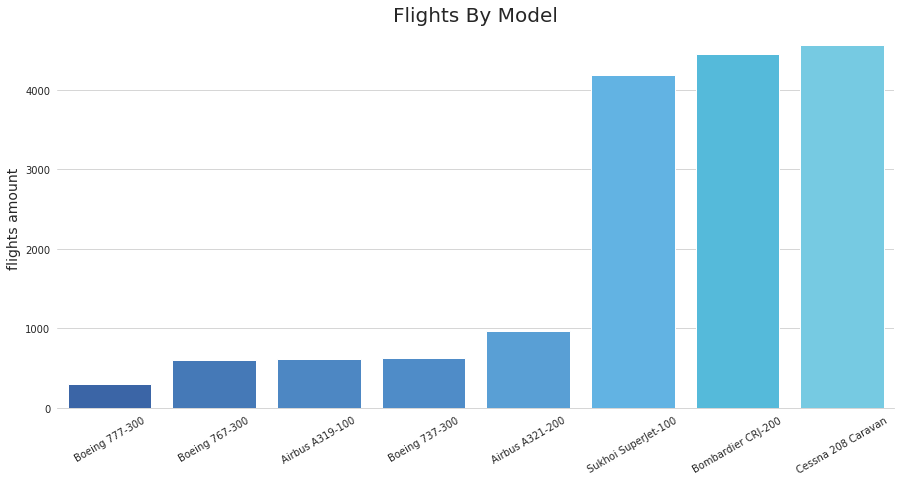

In [9]:
a = query_1.sort_values(by='flights_amount')

palette = ['#2961b8ff', '#3277caff', '#3987D7', '#3b8cdcff', '#44a2eaff', '#4db8f8ff', '#3fc5f0ff', '#64d4f4ff', '#7ddbf6ff', '#96e2f8ff']

sns.set_style("whitegrid")
plt.figure(figsize=(15, 7))
plt.title('Flights By Model', fontsize=20)
sns.barplot(x='model', y='flights_amount', data=a, label="line", palette=palette)
sns.despine(left=True)
plt.xlabel('')
plt.ylabel('flights amount', fontsize=14)
plt.xticks(rotation=30)
plt.show()


Самолеты моделей `Bombardier CRJ-200`, `Cessna 208 Caravan` и `Sukhoi SuperJet-100` совершают значительно большее количество полетов по сравнению с другими моделями. Эти самолеты маленькие и их могут запускать на короткие направления, возможно поэтому они совершают количество перелетов в несколько раз превышающее количество перелетов других моделей. Меньше всего перелетов у крупнейшего `Boeing 777-300`

### Количество рейсов в зависимости от города

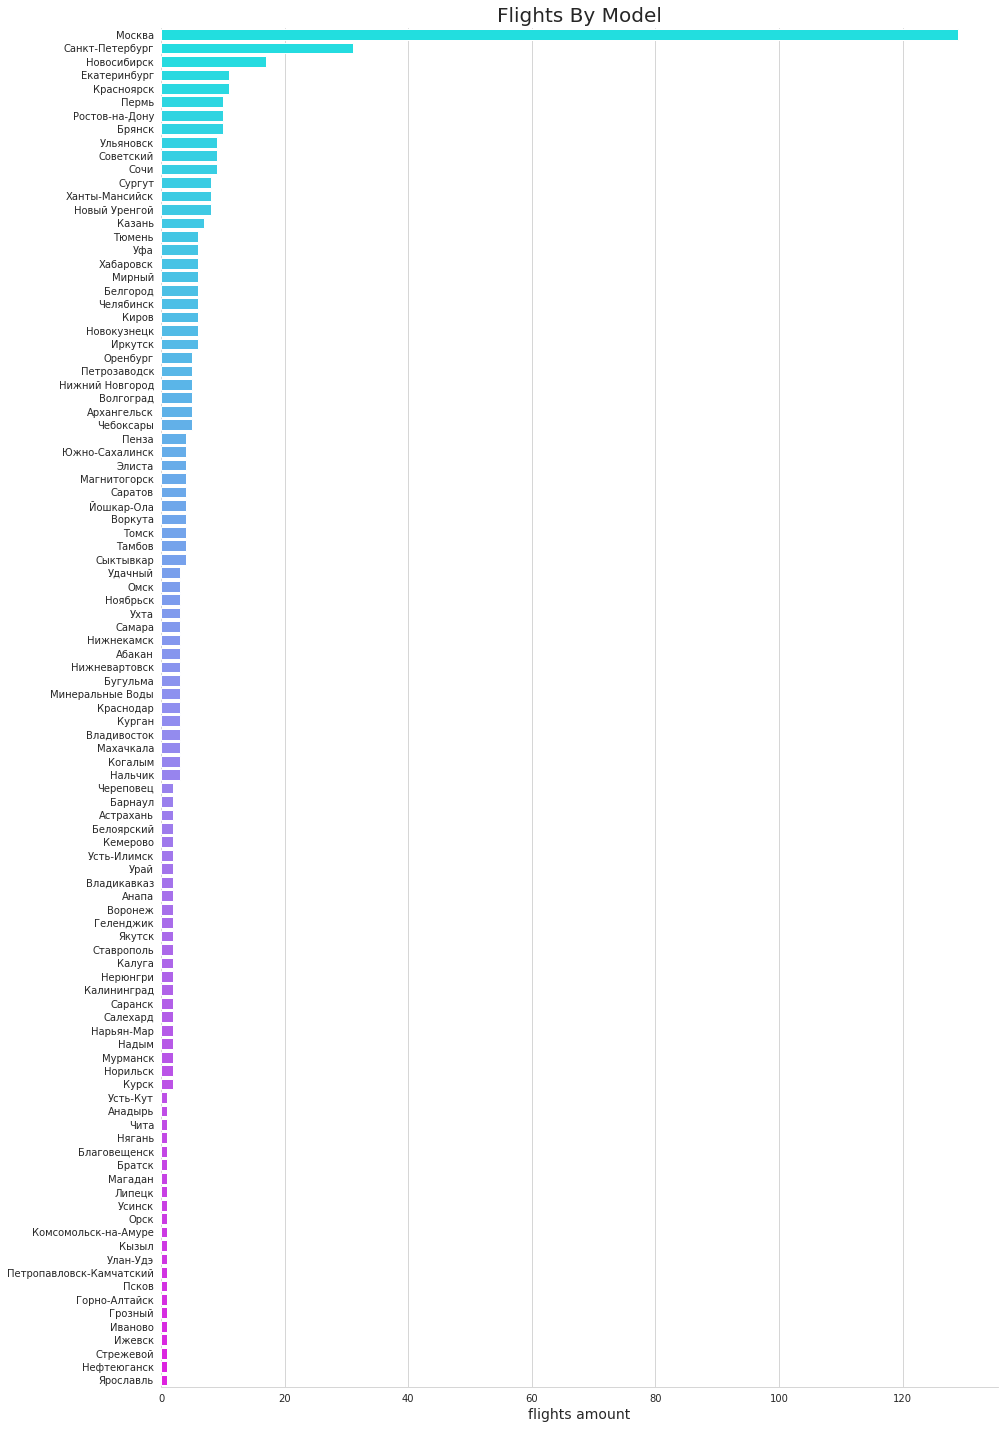

In [10]:
b = query_3.sort_values(by='average_flights', ascending=False)

plt.figure(figsize=(15, 25))
plt.title('Flights By Model', fontsize=20)
sns.barplot(x='average_flights', y='city', data=b, palette='cool')
sns.despine(left=True)
plt.ylabel('')
plt.xlabel('flights amount', fontsize=14)
plt.show()


По городам лидирует столица, в остальных городах перелетов мало, в среднем не больше 5

### Топ-10 городов по количеству рейсов

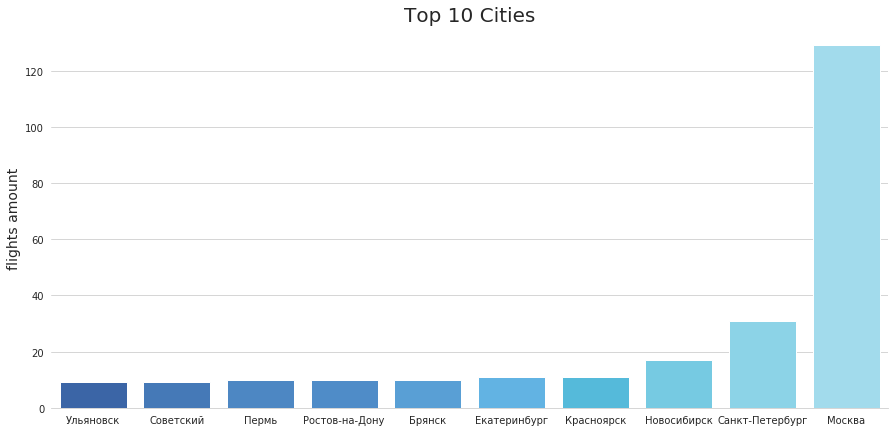

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 7))
plt.title('Top 10 Cities', fontsize=20)
sns.barplot(x='city', y='average_flights', data=top10_cities.sort_values(by='average_flights', ascending=True), palette=palette)
sns.despine(left=True)
plt.xlabel('')
plt.ylabel('flights amount', fontsize=14)
plt.show()


Тройка лидеров очевидна - Москва, Санкт-Петербург, Новосибирск. В остальных городах попавших в ТОП-10 всего около 10 перелетов

# Проверка гипотезы о влиянии проводимых фестевалей на средний спрос на авиабилеты

In [12]:
query_last = pd.read_csv('/datasets/query_last.csv')

In [13]:
query_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


### Проверим гипотезу: 

«Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

In [14]:
query_last

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


Получим два среза - строки с фестивалями и без.

In [15]:
query_last['festival_name'] = query_last['festival_name'].fillna('none')

no_festival = query_last.query('festival_name == "none"')
no_festival

,week_number,ticket_amount,festival_week,festival_name
2,32,51675,NaN,none
3,33,51378,NaN,none
4,34,51492,NaN,none
5,35,51360,NaN,none
7,37,51670,NaN,none
8,38,51518,NaN,none
9,39,51623,NaN,none


In [16]:
festival = query_last.query('festival_name != "none"')
festival

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
6,36,51386,36.0,Видфест


Сформулируем гипотезы

### Нулевая гипотеза:
    
"Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время"

### Альтернативная гипотеза:
    
"Средний спрос на билеты во время фестивалей отличается от среднего спросу на билеты в обычное время"

Для проверки равенства средних двух генеральных совокупностей используем метод `scipy.stats.ttest_ind`

In [17]:
from scipy import stats as st
import numpy as np

ticket_festival = festival['ticket_amount']
ticket_no_festival = no_festival['ticket_amount']

alpha = .05 

results = st.ttest_ind(
    ticket_festival, 
    ticket_no_festival)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.09688869045922928
Не получилось отвергнуть нулевую гипотезу


`P-value` равное `0.097`, это означает, что если бы выборки на самом деле были одинакомыми, то почти в 10% случаев различия между выборками получились случайно. 

`9,7%` - это достаточно большая вероятность, поэтому ей нельзя принебречь и отвергнуть нулевую гипотизу не получится. В то же время нельзя утверждать, что выборки не отличаются тоже нельзя. По этим данным мы не сможем с уверенностью сказать что средний спрос на билеты во время фестивалей незначительно отличается от среднего спроса в обычное время.